# Bank Marketing

O setor bancário está em constante evolução, e uma das principais estratégias para impulsionar os negócios é a utilização de campanhas de marketing direcionadas. Neste contexto, entender o comportamento dos clientes e identificar os fatores que influenciam suas decisões é essencial para otimizar os resultados dessas campanhas.

Neste projeto, trabalhamos com um dataset de Bank Marketing , que contém informações detalhadas sobre clientes abordados durante uma campanha de marketing de um banco. A variável alvo, denominada y , indica se o cliente adquiriu ou não o produto oferecido (neste caso, um depósito a prazo).

Nosso objetivo é realizar uma análise exploratória completa do dataset, respondendo perguntas relevantes e extraindo insights valiosos que possam orientar decisões estratégicas. Ao longo deste trabalho, investigaremos padrões, correlações e tendências nos dados, além de explorar como diferentes atributos dos clientes impactam a probabilidade de aceitação do produto.

Este estudo não apenas contribui para uma compreensão mais profunda do comportamento dos clientes, mas também serve como base para o desenvolvimento de modelos preditivos e estratégias de marketing mais eficazes.

Fonte: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Carregando Bibliotecas

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Carregando Dataset

In [217]:
bank = pd.read_csv("datasets/bank_marketing.csv", sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [218]:
bank.shape

(4521, 17)

In [219]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Dicionário das Colunas

**age**: Idade do cliente

**job**: Tipo de trabalho do cliente

**marital**: Estado civil do cliente

**education**: Nível de educação do cliente

**default**: Indica se o cliente é inadimplente ou não

**balance**: Saldo médio anual na conta do cliente

**housing**: Indica se o cliente possui um empréstimo de habitação

**loan**: Indica se o cliente possui um empréstimo pessoal

**contact**: Meio de contato com o cliente

**day**: Dia do mês que o cliente foi contatado pela última vez

**month**: Mês em que o cliente foi contatado pela última vez

**duration**: Duração do último contato com o cliente, em segundos.

**campaing**: Número de contatos realizados durante esta campanha para este cliente.

**pdays**: Número de dias que se passaram desde o último contato com o cliente em uma campanha anterior. Um valor de -1 significa que o cliente não foi contatado anteriormente.

**previous**: Número de contatos realizados antes desta campanha para este cliente.

**poutcome**: Resultado da campanha de marketing anterior 

**y**: Variável alvo: indica se o cliente subscreveu ao produto (depósito a prazo) ("yes" ou "no").


## Analise Exploratória

### Análise Univariada

In [227]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels)

#### Distribuição de Idades

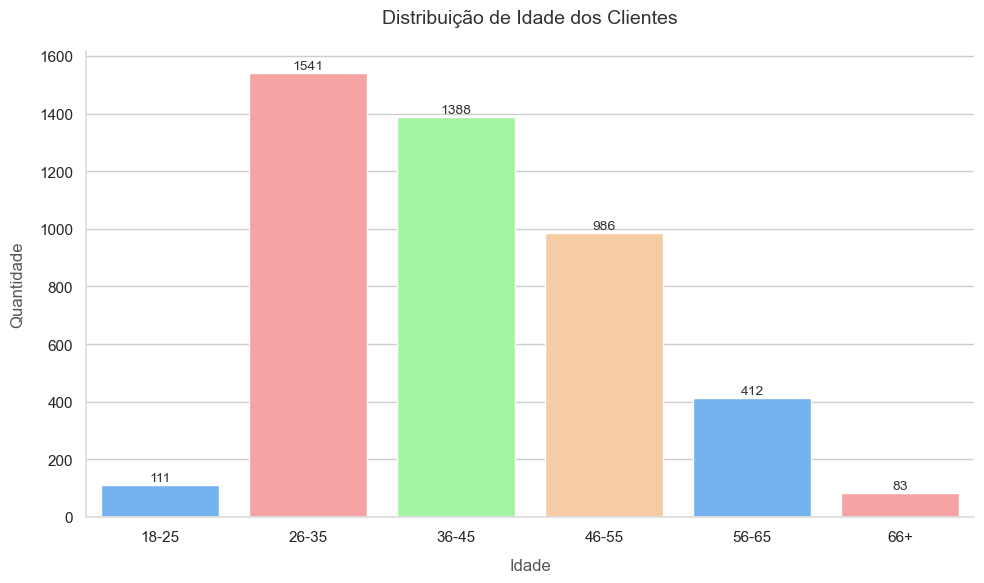

In [230]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    x='age_group',
    data=bank,
    palette=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'],  
    saturation=0.8
)

plt.title('Distribuição de Idade dos Clientes', fontsize=14, pad=20, color='#333333')
plt.xlabel('Idade', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Quantidade', fontsize=12, labelpad=10, color='#555555')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#dddddd')
ax.spines['bottom'].set_color('#dddddd')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10,
                color='#333333')

plt.tight_layout()
plt.show()

#### Distribuição de Profissão dos Clientes

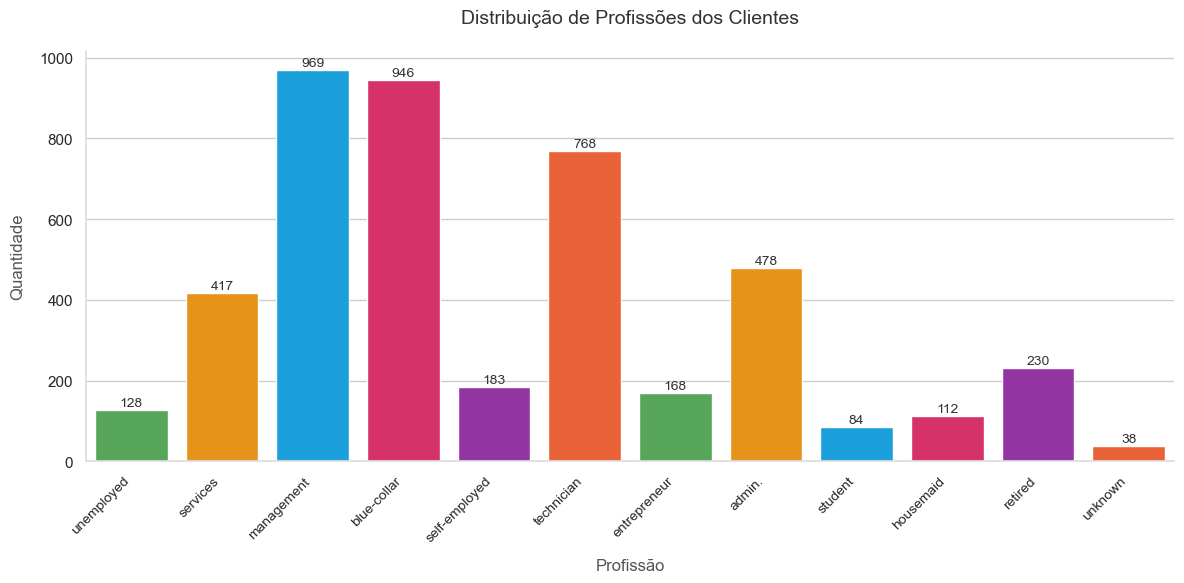

In [233]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  #

palette = ['#4CAF50', '#FF9800', '#03A9F4', '#E91E63', '#9C27B0', '#FF5722']  
ax = sns.countplot(
    x='job',
    data=bank,
    palette=palette,  
    saturation=0.8
)

plt.title('Distribuição de Profissões dos Clientes', fontsize=14, pad=20, color='#333333')
plt.xlabel('Profissão', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Quantidade', fontsize=12, labelpad=10, color='#555555')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#dddddd')
ax.spines['bottom'].set_color('#dddddd')

plt.xticks(rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10,
                color='#333333')

plt.tight_layout()
plt.show()

#### Distribuição de Forma de Contato com os Clientes

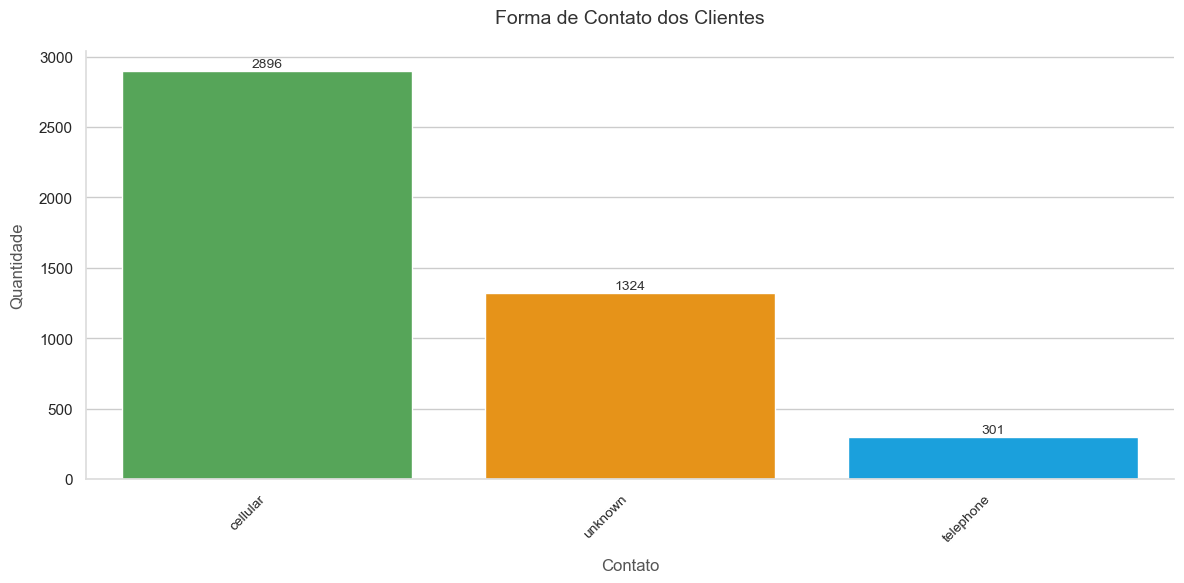

In [235]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  

palette = ['#4CAF50', '#FF9800', '#03A9F4', '#E91E63', '#9C27B0', '#FF5722']  
ax = sns.countplot(
    x='contact',
    data=bank,
    palette=palette,  
    saturation=0.8
)

plt.title('Forma de Contato dos Clientes', fontsize=14, pad=20, color='#333333')
plt.xlabel('Contato', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Quantidade', fontsize=12, labelpad=10, color='#555555')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#dddddd')
ax.spines['bottom'].set_color('#dddddd')

plt.xticks(rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10,
                color='#333333')

plt.tight_layout()
plt.show()

#### Distribuição de Estado Civil dos Clientes

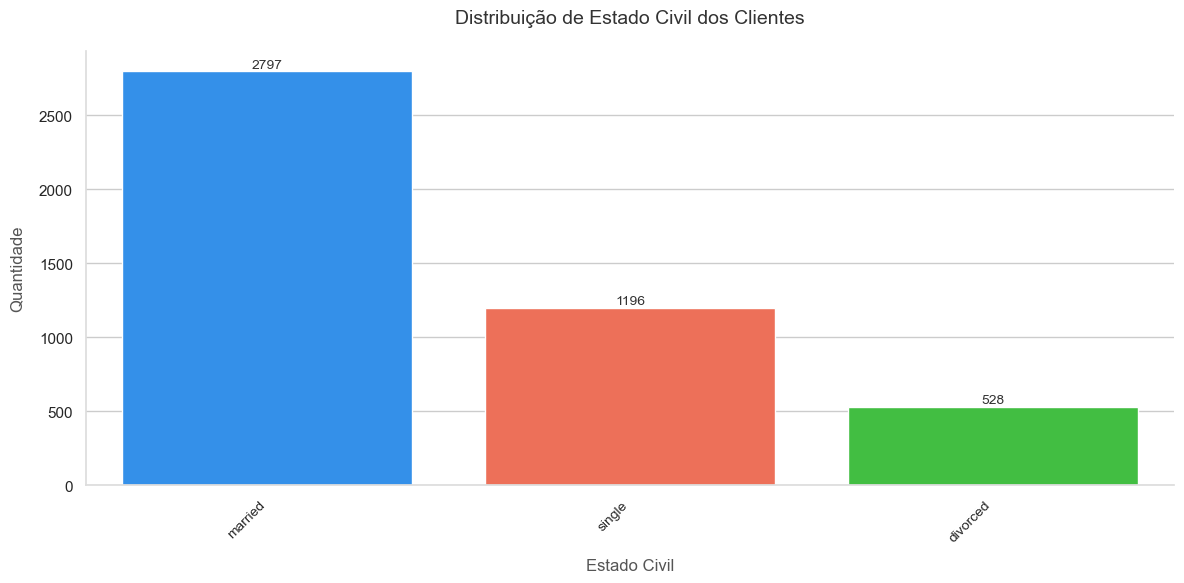

In [238]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 

palette = ['#1E90FF', '#FF6347', '#32CD32', '#FFD700', '#8A2BE2', '#FF4500']
ax = sns.countplot(
    x='marital',
    data=bank,
    palette=palette,  
    saturation=0.8
)

plt.title('Distribuição de Estado Civil dos Clientes', fontsize=14, pad=20, color='#333333')
plt.xlabel('Estado Civil', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Quantidade', fontsize=12, labelpad=10, color='#555555')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#dddddd')
ax.spines['bottom'].set_color('#dddddd')

plt.xticks(rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10,
                color='#333333')


plt.tight_layout()
plt.show()

### **Relatório da Análise Univariada**

A análise univariada permitiu mapear o perfil demográfico e comportamental dos clientes do banco, revelando padrões essenciais para entender o público-alvo da campanha. Os principais insights são:

#### **1. Distribuição de Idade**  
- **Faixa etária predominante**: 86.6% dos clientes estão entre **26 e 55 anos**, com mediana de 42 anos.  
- **Observações**:  
  - A distribuição é ligeiramente assimétrica à direita, indicando maior concentração de clientes na fase adulta economicamente ativa.  
  - A menor representatividade está na faixa acima de 65 anos, sugerindo menor engajamento com clientes mais velhos.

#### **2. Profissão**  
- **Principais categorias**:
  - **Management**: 21.4% (cargos de liderança ou alta responsabilidade).  
  - **Blue Collar**: 20.9% (profissionais com empregos manuais ou operários).  
  - **Technician**: 16.9% (profissionais técnicos ou especializados).  
- **Observações**:  
  - Esses três grupos somam **59.2% do total**, indicando um público majoritariamente composto por trabalhadores estáveis e com renda regular.  
  - A categoria "Unknown" (10%) aponta para falhas na coleta de dados, o que pode comprometer análises futuras.

#### **3. Meio de Contato**  
- **Principais canais**:  
  - **Celular**: 64% dos contatos.
  - **Dados faltantes**: 29.3% (indicados como "Unknown").  
  - **Telefone fixo**: 6.7%.  
- **Observações**:  
  - O alto percentual de dados não registrados sugere **falhas operacionais** no registro das interações.  
  - O celular é o canal preferencial, alinhado com tendências de digitalização dos serviços bancários.

#### **4. Estado Civil**  
- **Distribuição**:  
  - **Casados**: 61.9% (maioria significativa).  
  - **Solteiros**: 26.5%.  
  - **Divorciados/Viúvos**: 11.7%.  
- **Observações**:  
  - Clientes casados são o grupo mais abordado, possivelmente devido à percepção de maior estabilidade financeira.  
  - Estratégias específicas podem ser necessárias para engajar solteiros.

---

### **Perfil do Cliente Típico**  
| **Característica**       | **Descrição**                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| **Idade**                | Adulto entre 26 e 55 anos, economicamente ativo.                           |
| **Profissão**            | Trabalhador com ocupação estável (Blue Collar, Management ou Technician).  |
| **Estado Civil**         | Casado, sugerindo responsabilidades familiares.                            |
| **Canal de Contato**     | Majoritariamente por celular, mas com gaps nos registros.                  |

---

### **Recomendações Iniciais**  
1. **Melhorar a qualidade dos dados**: Investigar a causa dos registros "Unknown".  
2. **Segmentação estratégica**: Criar campanhas direcionadas para grupos sub-representados (ex.: clientes acima de 65 anos).  
3. **Otimizar canais digitais**: Priorizar o contato via celular, mas diversificar estratégias para reduzir dependência.  

---

**Próximos passos**:  
Na análise bivariada, investigaremos como algumas variáveis se relacionam com o saldo médio e a target (y)

### Análise Bivariada

#### Gráfico de Dispersão entre Idade e Saldo Bancário

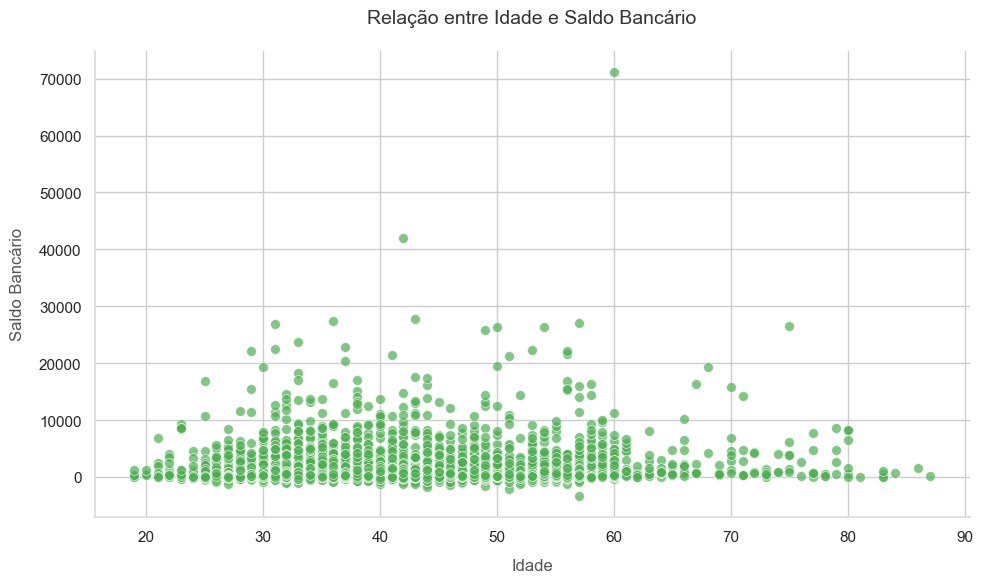

In [243]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

scatter_plot = sns.scatterplot(
    x='age',          
    y='balance',      
    data=bank,        
    color='#4CAF50',  
    alpha=0.7,        
    s=50              
)


plt.title('Relação entre Idade e Saldo Bancário', fontsize=14, pad=20, color='#333333')
plt.xlabel('Idade', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo Bancário', fontsize=12, labelpad=10, color='#555555')


scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
scatter_plot.spines['left'].set_color('#dddddd')
scatter_plot.spines['bottom'].set_color('#dddddd')

plt.tight_layout()
plt.show()

#### Distribuição de Saldo Médio por Empréstimo

In [245]:
# Calculando saldo médio por empréstimo
mean_balance_by_loan = bank.groupby('loan')['balance'].mean().reset_index()

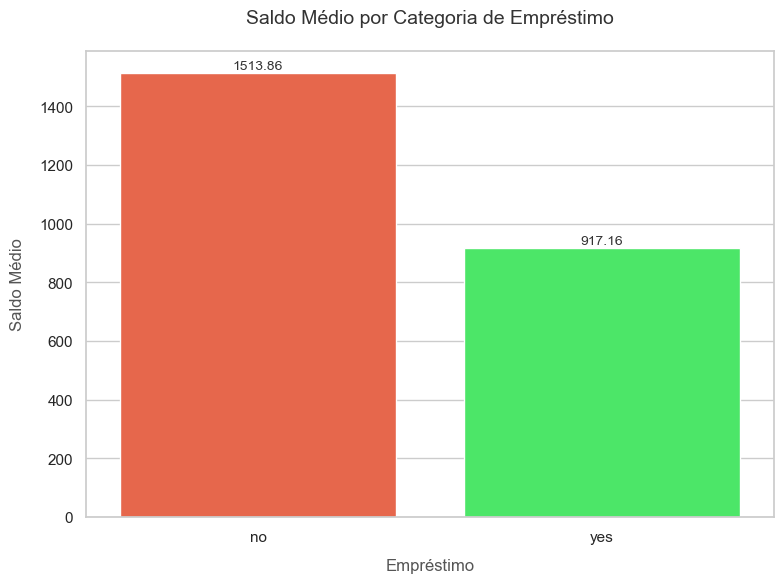

In [247]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

bar_plot = sns.barplot(
    x='loan',          
    y='balance',       
    data=mean_balance_by_loan,
    palette={'no': '#FF5733', 'yes': '#33FF57'},  
    ci=None            
)


plt.title('Saldo Médio por Categoria de Empréstimo', fontsize=14, pad=20, color='#333333')
plt.xlabel('Empréstimo', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo Médio', fontsize=12, labelpad=10, color='#555555')


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points',
                      fontsize=10,
                      color='#333333')


plt.tight_layout()
plt.show()

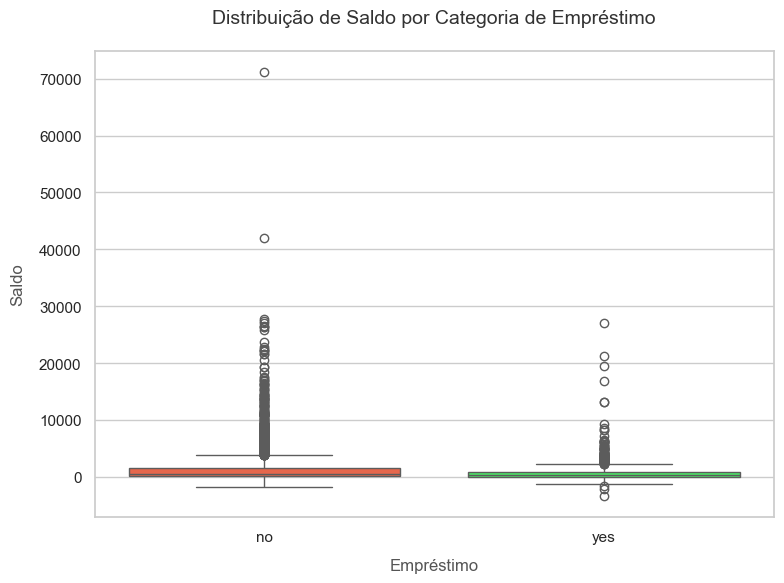

In [248]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

box_plot = sns.boxplot(
    x='loan',          
    y='balance',       
    data=bank,
    palette={'no': '#FF5733', 'yes': '#33FF57'}  
)

plt.title('Distribuição de Saldo por Categoria de Empréstimo', fontsize=14, pad=20, color='#333333')
plt.xlabel('Empréstimo', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo', fontsize=12, labelpad=10, color='#555555')

plt.tight_layout()
plt.show()

Devido aos Outliers resolvi fazer o Boxplot em Escala Logarítmica para melhor visualização

In [250]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

box_plot = sns.boxplot(
    x='loan',          
    y='balance',       
    data=bank,
    palette={'no': '#FF5733', 'yes': '#33FF57'} 
)


plt.yscale('log')


plt.title('Distribuição de Saldo por Categoria de Empréstimo \n (Escala Logarítmica), fontsize=14, pad=20, color='#333333')
plt.xlabel('Empréstimo', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo', fontsize=12, labelpad=10, color='#555555')


plt.tight_layout()
plt.show()

SyntaxError: '(' was never closed (2955211459.py, line 15)

#### Distribuição de Saldo Médio por Financiamento Habitacional

In [ ]:
# Calcular o saldo médio por categoria de housing
mean_balance_by_housing = bank.groupby('housing')['balance'].mean().reset_index()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

bar_plot = sns.barplot(
    x='housing',          
    y='balance',          
    data=mean_balance_by_housing,
    palette={'no': '#3498DB', 'yes': '#FFA500'},  
    ci=None               
)

plt.title('Saldo Médio por Categoria de Financiamento Habitacional', fontsize=14, pad=20, color='#333333')
plt.xlabel('Financiamento Habitacional', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo Médio', fontsize=12, labelpad=10, color='#555555')

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points',
                      fontsize=10,
                      color='#333333')

plt.tight_layout()
plt.show()

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

box_plot = sns.boxplot(
    x='housing',         
    y='balance',          
    data=bank,
    palette={'no': '#3498DB', 'yes': '#FFA500'}  
)

plt.title('Distribuição de Saldo por Categoria de Financiamento Habitacional', fontsize=14, pad=20, color='#333333')
plt.xlabel('Financiamento Habitacional', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo', fontsize=12, labelpad=10, color='#555555')

plt.tight_layout()
plt.show()

In [ ]:
Como foi anteriormente devido aos Outliers resolvi fazer o Boxplot em Escala Logarítmica para melhor visualização

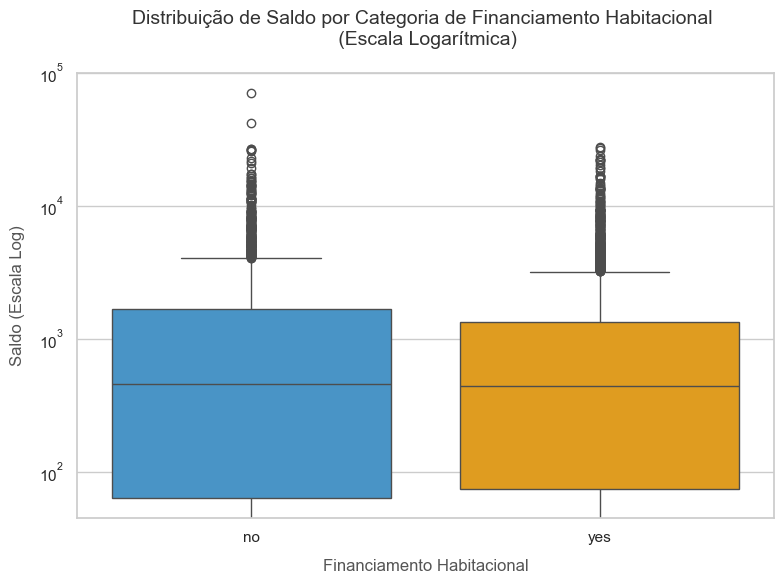

In [253]:
# Configurar estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Criar boxplot com escala logarítmica
box_plot = sns.boxplot(
    x='housing',          # Variável no eixo X (categorias: yes/no)
    y='balance',          # Variável no eixo Y (saldo)
    data=bank,
    palette={'no': '#3498DB', 'yes': '#FFA500'}  # Cores personalizadas
)

# Aplicar escala logarítmica no eixo Y
plt.yscale('log')

# Adicionar título e rótulos
plt.title('Distribuição de Saldo por Categoria de Financiamento Habitacional \n (Escala Logarítmica)', fontsize=14, pad=20, color='#333333')
plt.xlabel('Financiamento Habitacional', fontsize=12, labelpad=10, color='#555555')
plt.ylabel('Saldo (Escala Log)', fontsize=12, labelpad=10, color='#555555')

# Ajustar layout e mostrar gráfico
plt.tight_layout()
plt.show()

### **Relatório de Análise Bivariada: Saldo Médio e Comportamento de Aquisição**

#### **Objetivo da Análise**  
Investigar a relação entre o **saldo médio na conta (balance)** e a probabilidade de clientes adquirirem produtos financeiros (empréstimo pessoal e financiamento habitacional), identificando padrões e anomalias nos dados.

---

#### **1. Análise por Empréstimo Pessoal (`loan`)**  
- **Saldo Médio por Grupo**:  
  - **Clientes que não adquiriram empréstimo**: Média de saldo significativamente maior (1513.86)  
  - **Clientes que adquiriram empréstimo**: Média de saldo menor (917.16)
- **Insights**:  
  - Clientes com **menor saldo médio** estão mais propensos a contratar empréstimos, possivelmente devido a necessidades financeiras imediatas.  
  - A diferença entre os grupos é **acentuada** (redução de ~39.42% no saldo médio para quem adquiriu o produto).  

---

#### **2. Análise por Financiamento Habitacional (`housing`)**  
- **Saldo Médio por Grupo**:  
  - **Clientes sem financiamento**: Média de saldo ligeiramente maior (1595.28).  
  - **Clientes com financiamento**: Média de saldo menor (1290.31).  
- **Insights**:  
  - A diferença é **menos pronunciada** comparada aos empréstimos pessoais (redução de 19.12%).  
  - Indica que o financiamento habitacional pode atrair clientes com perfis financeiros **mais estáveis**, mesmo com saldo moderado.  

---

#### **3. Padrão Observado**  
- **Tendência geral**:  
  Clientes com **saldo médio mais baixo** têm maior probabilidade de adquirir produtos financeiros (empréstimos/financiamentos).  
- **Hipóteses**:  
  - Necessidade de liquidez imediata para cobrir dívidas ou investimentos.  
  - Ofertas de crédito podem ser direcionadas a clientes com menor capacidade de poupança.  

---

#### **4. Recomendações Estratégicas**  
1. **Segmentação de clientes**:  
   - Priorizar clientes com saldo médio menor para campanhas de empréstimo.  
   - Oferecer financiamento habitacional para clientes com saldo moderado.  
2. **Revisão de critérios de crédito**:  
   - Avaliar alinhamento entre concessão de crédito para saldos baixos e perfil de risco.  
3. **Coleta de dados complementares**:  
   - Incluir histórico de crédito, renda mensal e *score* de crédito.

---

### Investigação de Outliers

In [258]:
print(bank['balance'].describe())

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64


Identificar outliers usando IQR (Intervalo Interquartil)

In [261]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = bank[(bank['balance'] < lower_bound) | (bank['balance'] > upper_bound)]
print(outliers)

      age            job   marital  education default  balance housing loan  \
1      33       services   married  secondary      no     4789     yes  yes   
10     39       services   married  secondary      no     9374     yes   no   
16     56     technician   married  secondary      no     4073      no   no   
25     41     management   married   tertiary      no     5883      no   no   
30     68        retired  divorced  secondary      no     4189      no   no   
...   ...            ...       ...        ...     ...      ...     ...  ...   
4464   53       services  divorced  secondary      no     4554      no   no   
4473   33     technician   married  secondary      no     4790     yes   no   
4489   45     management   married   tertiary      no     6945      no   no   
4500   38         admin.   married  secondary      no     4196     yes   no   
4517   57  self-employed   married   tertiary     yes    -3313     yes  yes   

        contact  day month  duration  campaign  pda

Histograma para visualizar a distribuição

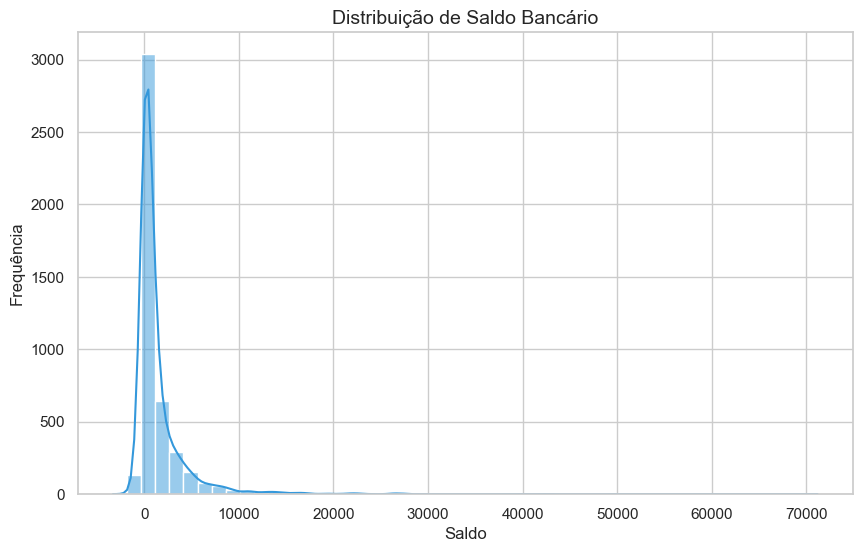

In [264]:
plt.figure(figsize=(10, 6))
sns.histplot(bank['balance'], bins=50, kde=True, color='#3498DB')
plt.title('Distribuição de Saldo Bancário', fontsize=14)
plt.xlabel('Saldo', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

Verificando o Cliente com o maior saldo para ver se não é um erro

In [267]:
max_balance = bank['balance'].max()

cliente_max_balance = bank[bank['balance'] == max_balance]

print("Cliente com o maior saldo (outlier máximo):")
print(cliente_max_balance)

Cliente com o maior saldo (outlier máximo):
      age      job  marital education default  balance housing loan   contact  \
3700   60  retired  married   primary      no    71188      no   no  cellular   

      day month  duration  campaign  pdays  previous poutcome   y age_group  
3700    6   oct       205         1     -1         0  unknown  no     56-65  


#### **Relatório de Investigação de Outliers**

- **Observações críticas**:  
  - **Outliers no grupo de não contratação**: Identificamos clientes com saldos extremamente altos que optaram por **não contratar** empréstimos pessoais ou financiamentos habitacionais. Esses valores não parecem ser erros, mas sim reflexos de indivíduos com maior poder aquisitivo, que podem preferir manter reservas financeiras elevadas e evitar comprometimentos de crédito.  
  - **Outliers no grupo de contratação**: Também encontramos clientes com saldos muito altos que **contrataram** esses produtos. Isso sugere que, mesmo entre indivíduos com maior poder aquisitivo, há perfis dispostos a aproveitar oportunidades únicas, como taxas de juros baixas, ofertas personalizadas ou investimentos de longo prazo.  

- **Hipóteses iniciais**:  
  1. Os outliers altos no grupo de **não contratação** indicam uma tendência de **conservadorismo financeiro** entre pessoas com maior poder aquisitivo, priorizando a segurança financeira e a manutenção de reservas.  
  2. Os outliers altos no grupo de **contratação** refletem estratégias ativas de uso de crédito, mesmo para indivíduos com alto saldo médio, possivelmente para otimizar fluxos de caixa ou aproveitar condições vantajosas.  
  3. A presença desses outliers demonstra que há uma **camada significativa da população com renda elevada**, o que deve ser considerado ao segmentar públicos-alvo para campanhas futuras relacionadas a empréstimos e financiamentos.  

#### Target

In [272]:
# Converter 'yes' para 1 e 'no' para 0
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

print(bank['y'].unique())  

[0 1]


#### Distribuição de Target

In [274]:
variables_of_interest = ['housing', 'default', 'loan']

In [277]:
proportions = {}

for var in variables_of_interest:
    proportions[var] = bank.groupby(var)['y'].value_counts(normalize=True).unstack().fillna(0)

proportions_df = pd.concat(proportions, axis=1).fillna(0)

print(proportions_df)

      housing             default                loan          
y           0         1         0         1         0         1
no   0.846585  0.153415  0.884814  0.115186  0.875196  0.124804
yes  0.914029  0.085971  0.881579  0.118421  0.937771  0.062229


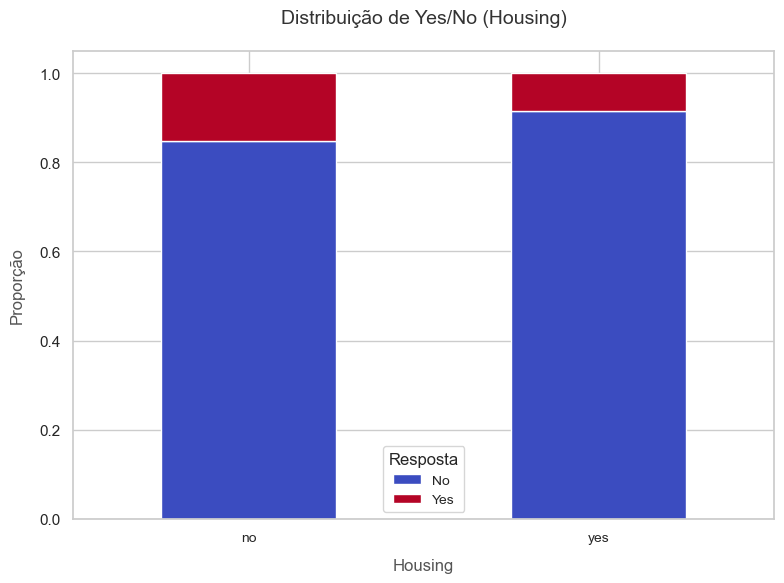

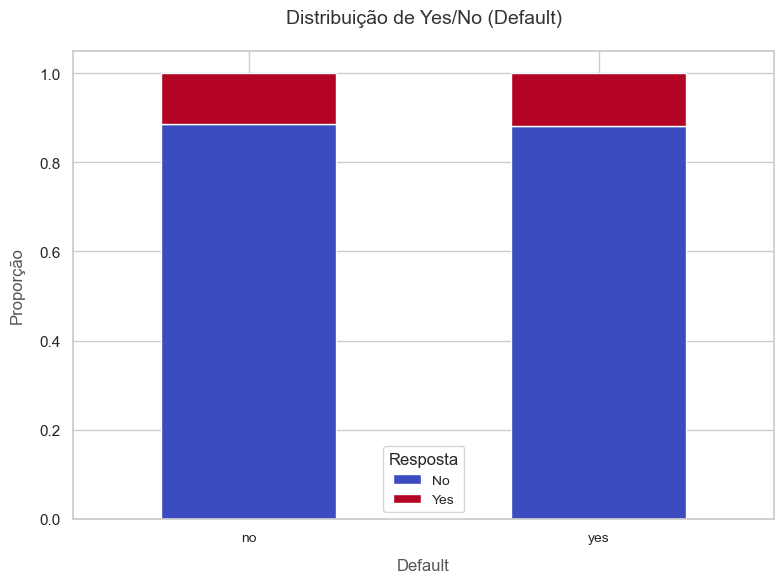

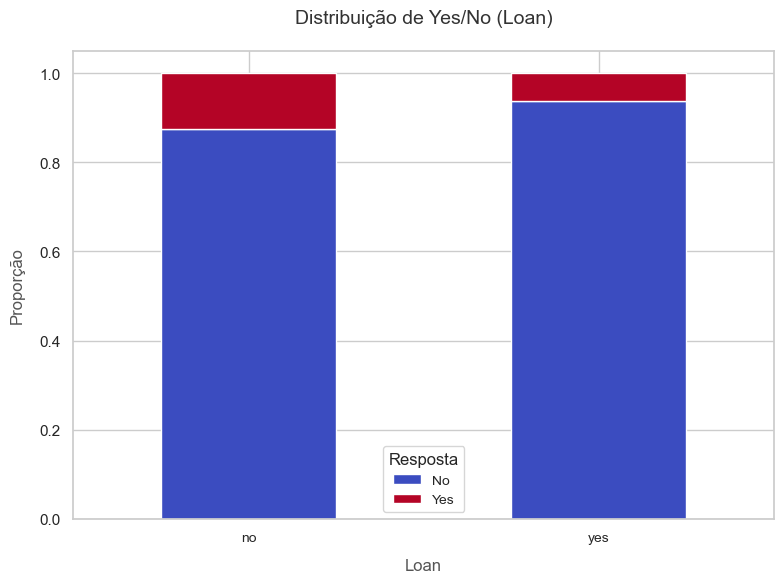

In [279]:
sns.set(style="whitegrid")

for var in variables_of_interest:
    proportions_var = bank.groupby(var)['y'].value_counts(normalize=True).unstack().fillna(0)

    ax = proportions_var.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')

    plt.title(f'Distribuição de Yes/No ({var.capitalize()})', fontsize=14, pad=20, color='#333333')
    plt.xlabel(var.capitalize(), fontsize=12, labelpad=10, color='#555555')
    plt.ylabel('Proporção', fontsize=12, labelpad=10, color='#555555')

    plt.xticks(rotation=0, fontsize=10)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    for i, label in enumerate(labels):
        if label == '1':  # Representa 'yes'
            new_labels.append(f"Yes")
        elif label == '0':  # Representa 'no'
            new_labels.append(f"No")
    ax.legend(handles, new_labels, title="Resposta", fontsize=10)


    plt.tight_layout()
    plt.show()

### Matriz de Correlação

In [281]:
numeric_columns = bank.select_dtypes(include=['float64', 'int64'])

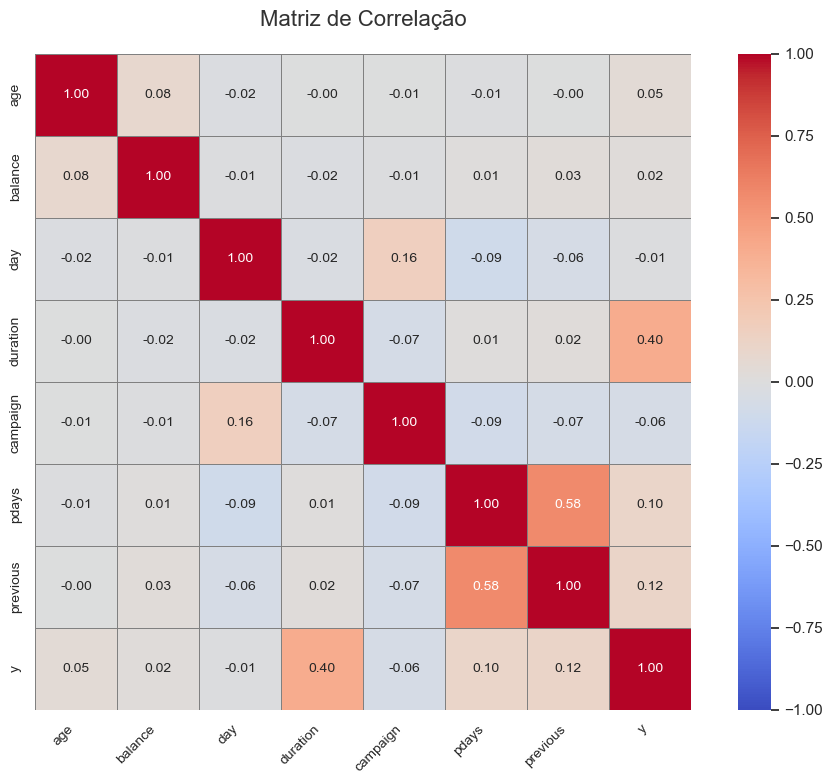

In [283]:
correlation_matrix = numeric_columns.corr()

sns.set(style="white")


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,                
    fmt=".2f",                 
    cmap="coolwarm",           
    vmin=-1, vmax=1,           
    cbar=True,                 
    square=True,               
    linewidths=0.5,            
    linecolor='gray',          
    annot_kws={"size": 10}     
)


plt.title('Matriz de Correlação', fontsize=16, pad=20, color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)                           
plt.tight_layout()
plt.show()

### **Análise das Relações entre as Variáveis e o Alvo (`y`)**

Após analisarmos a distribuição da variável alvo (`y`, depósito a prazo), identificamos padrões importantes ao relacionar as principais variáveis categóricas e numéricas com o resultado da campanha. Esses insights ajudam a entender o comportamento dos clientes e orientar decisões estratégicas.

#### **1. Financiamento Habitacional (`housing`):**
- Observamos que a **maioria dos clientes que adquiriram o depósito a prazo não possui financiamento habitacional**.
- Especificamente:
  - **90% dos clientes que adquiriram o depósito a prazo** não têm financiamento habitacional.
  - Apenas **10% dos clientes que adquiriram o depósito a prazo** possuem financiamento habitacional.
- Isso sugere que clientes com financiamento habitacional são menos propensos a aderir ao depósito a prazo, possivelmente devido a compromissos financeiros prévios ou menor capacidade de poupança.

#### **2. Empréstimo Pessoal (`loan`):**
- Similar ao financiamento habitacional, a **maior parte dos clientes que adquiriram o depósito a prazo não possui empréstimos pessoais**.
- Este padrão indica que clientes sem dívidas ativas (como empréstimos) estão mais inclinados a investir em produtos financeiros como depósitos a prazo.
- A ausência de compromissos de crédito pode refletir maior estabilidade financeira, tornando esses clientes mais receptivos à oferta do banco.

#### **3. Inadimplência (`default`):**
- Em relação à inadimplência, observamos um **pequeno aumento na proporção de clientes inadimplentes entre aqueles que adquiriram o depósito a prazo**.
- No entanto, essa diferença é **marginal e pouco relevante** para a análise preditiva.
- Isso sugere que a inadimplência não é um fator determinante para a adesão ao depósito a prazo, possivelmente porque os clientes inadimplentes representam uma parcela pequena do dataset.

#### **4. Correlação com a Duração da Chamada (`duration`):**
- A única variável numérica que apresenta correlação significativa com o alvo (`y`) é **`duration`**, que representa a duração da chamada durante o contato com o cliente.
- Observamos que quanto maior a duração da chamada, maior a probabilidade de o cliente adquirir o depósito a prazo.
- **Importante**: Embora exista uma correlação clara entre `duration` e `y`, **correlação não implica causalidade**. Ou seja, a duração da chamada pode ser um indicador de interesse do cliente, mas não necessariamente a causa direta da decisão de adesão.
- Além disso, a variável `duration` é coletada durante a interação com o cliente, o que significa que ela não pode ser usada como preditor em modelos que visam prever o sucesso da campanha antes do contato.

#### **5. Insights Gerais:**
- **Financiamento habitacional e empréstimos pessoais** parecem desempenhar um papel importante no comportamento dos clientes. Clientes sem compromissos financeiros prévios (financiamentos ou empréstimos) são mais propensos a aderir ao depósito a prazo.
- **Inadimplência** não parece ser um fator relevante para explicar a adesão ao produto, indicando que outras variáveis (como saldo médio ou profissão) podem ter maior impacto.
- A **duração da chamada** é um forte indicador de sucesso, mas deve ser interpretada com cautela, considerando sua natureza dependente do contato direto com o cliente.

#### **Próximos Passos:**
- Investigar outras variáveis potencialmente relevantes, como **saldo médio (`balance`)**, **idade (`age`)** e **profissão (`job`)**, para identificar padrões mais robustos.
- Desenvolver modelos preditivos que considerem as variáveis independentes do contato com o cliente (ex.: dados demográficos e financeiros) para prever a probabilidade de adesão ao depósito a prazo.
- Explorar interações entre variáveis, como a combinação de idade e saldo médio, para capturar nuances comportamentais.

### Probabilidade de um cliente adquirir o depósito bancário após retorno de chamadas

In [118]:
print(bank['y'].unique())

[0 1]


In [120]:
# Filtrar clientes com contatos anteriores (previous > 0)
previous_contacts = bank[bank['previous'] > 0]

# Verificar se há clientes com contatos anteriores
if not previous_contacts.empty:
    # Contagem de respostas 'yes' e 'no' para esses clientes
    print(previous_contacts['y'].value_counts())
else:
    print("Não há clientes com contatos anteriores.")

y
0    632
1    184
Name: count, dtype: int64


In [128]:
total_previous_contacts = len(previous_contacts)

successful_previous_contacts = previous_contacts[previous_contacts['y'] == 1]
count_successful_previous_contacts = len(successful_previous_contacts)

if total_previous_contacts > 0:
    conditional_probability = count_successful_previous_contacts / total_previous_contacts
else:
    conditional_probability = 0  

print(f"Total de clientes com contatos anteriores: {total_previous_contacts}")
print(f"Clientes que adquiriram o depósito bancário: {count_successful_previous_contacts}")
print(f"Probabilidade condicional: {conditional_probability:.4f}")

Total de clientes com contatos anteriores: 816
Clientes que adquiriram o depósito bancário: 184
Probabilidade condicional: 0.2255


### **Relatório: Probabilidade de Adesão ao Depósito a Prazo**

Após a análise detalhada dos dados, verificamos que a **probabilidade de um cliente adquirir o depósito a prazo após o retorno de chamadas** é de aproximadamente **0.2255**, ou seja, cerca de **22.55%**. Esse valor pode ser interpretado como a taxa média de sucesso da campanha de marketing realizada pelo banco.

#### **Interpretação do Valor**
- **Taxa de conversão relativamente baixa**: Uma probabilidade de 22.55% sugere que, em média, pouco mais de 1 em cada 5 clientes abordados aceitou o produto. Embora essa taxa não seja extremamente alta, ela reflete um cenário realista de campanhas de marketing bancário, onde a decisão de adesão depende de múltiplos fatores, como perfil financeiro, necessidades individuais e contexto econômico.
- **Comparação com benchmarks**: Em campanhas de marketing semelhantes, taxas de conversão entre **20% e 30%** são consideradas razoáveis, especialmente quando o produto oferecido exige comprometimento financeiro, como depósitos a prazo. Portanto, o valor de **22.55%** está dentro do esperado para este tipo de oferta ([Fonte: HubSpot Benchmark Study](https://www.hubspot.com/benchmarks)).

#### **Fatores que Influenciam a Probabilidade**
A análise das variáveis relacionadas à adesão ao depósito a prazo revelou alguns padrões importantes:
1. **Compromissos financeiros prévios**: Clientes sem financiamento habitacional ou empréstimos pessoais apresentaram maior probabilidade de aderir ao depósito a prazo. Isso sugere que a ausência de dívidas ativas aumenta a disposição para investimentos financeiros
2. **Duração da chamada (`duration`)**: Observamos que quanto maior a duração da interação com o cliente, maior a probabilidade de sucesso. Isso indica que explicações mais detalhadas sobre o produto ou um atendimento personalizado podem influenciar positivamente a decisão do cliente
3. **Perfil demográfico e financeiro**: Variáveis como saldo médio (`balance`), idade (`age`) e profissão (`job`) também desempenham papéis importantes. Por exemplo, clientes com maior poder aquisitivo ou pertencentes a certas categorias profissionais (como "management") tendem a ser mais receptivos ao produto.

#### **Implicações Práticas**
- **Otimização da abordagem**: Com base na taxa de conversão de 22.55%, o banco pode ajustar suas estratégias de marketing para segmentar melhor os clientes-alvo. Por exemplo, priorizar clientes sem compromissos financeiros prévios ou aqueles com perfis financeiros mais estáveis pode aumentar as chances de sucesso.
- **Treinamento da equipe de vendas**: A correlação entre a duração da chamada e a probabilidade de adesão sugere que a qualidade do contato é crucial. Treinar a equipe de vendas para engajar melhor os clientes durante as interações pode resultar em taxas de conversão mais altas.
- **Análise de custo-benefício**: Considerando que apenas 22.55% dos clientes abordados aderiram ao produto, é importante avaliar se os recursos investidos na campanha estão gerando um retorno satisfatório. Isso pode incluir a análise do custo por cliente convertido e a otimização dos canais de contato.

#### **Próximo Passo**
- **Modelagem preditiva**: Utilizar modelos de machine learning para prever a probabilidade de adesão com base em variáveis independentes (como dados demográficos e financeiros) pode ajudar a identificar clientes com maior potencial de conversão antes mesmo do contato 

---

### **Referências**
- [HubSpot Benchmark Study](https://www.hubspot.com/benchmarks)